#Extracting Tweets(web scraping)

In [ ]:
pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.8/71.8 KB 2.9 MB/s eta 0:00:00


In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np

In [ ]:
query = 'python'

In [ ]:
query = "Kanye West"
tweets = []
limit = 250

for tweet in sntwitter.TwitterSearchScraper(query).get_items():
  # print(vars(tweet))

  # break
  if len(tweets) == limit:
    break

  else:
    tweets.append( [tweet.content])

df = pd.DataFrame(tweets, columns = [ 'Tweet'])
print(df)

<ipython-input-4-2d66d2a54690>:13: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets.append( [tweet.content])


                                                 Tweet
0    @Caiodsouza13 @samueleocadio @Kovero_mc e qual...
1    @heIIpopstar publicacion patrocinada por kanye...
2    Kanye West - Yeezus Full Album https://t.co/q6...
3    POWER x Kanye West was launched as a tease vid...
4    @Timcast Just to be clear, Tim is saying LGBTQ...
..                                                 ...
245                    como assim o kanye west tem fãs
246      @joaozinhofx Kanye West brasileiro, eu sou fã
247  @RapMais Eu acho q o kanye west morreu a 10 an...
248  @OhNoMo6 @Odelia_Too @IngloriousBhere @David_i...
249                           Kanye West - Goodmorning

[250 rows x 1 columns]


Saving data to csv file

In [ ]:
df = df.to_csv('data')

In [ ]:
df = pd.read_csv('data')
df.head()

,Unnamed: 0,Tweet
0,0,@Caiodsouza13 @samueleocadio @Kovero_mc e qual...
1,1,@heIIpopstar publicacion patrocinada por kanye...
2,2,Kanye West - Yeezus Full Album https://t.co/q6...
3,3,POWER x Kanye West was launched as a tease vid...
4,4,"@Timcast Just to be clear, Tim is saying LGBTQ..."


#Pre-processing

Lower casing the text

In [ ]:
df['Tweet'].str.lower()
df

,Unnamed: 0,Tweet
0,0,@Caiodsouza13 @samueleocadio @Kovero_mc e qual...
1,1,@heIIpopstar publicacion patrocinada por kanye...
2,2,Kanye West - Yeezus Full Album https://t.co/q6...
3,3,POWER x Kanye West was launched as a tease vid...
4,4,"@Timcast Just to be clear, Tim is saying LGBTQ..."
...,...,...
245,245,como assim o kanye west tem fãs
246,246,"@joaozinhofx Kanye West brasileiro, eu sou fã"
247,247,@RapMais Eu acho q o kanye west morreu a 10 an...
248,248,@OhNoMo6 @Odelia_Too @IngloriousBhere @David_i...


In [ ]:
import nltk
nltk.download('all')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from string import punctuation
nltk.download('punkt')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

Remove the https and unknown variables

In [ ]:
import re
def remove_username_links(tweet):
  tweet=re.sub('@[^\s]+','',tweet)
  tweet=re.sub('http[^\s]+','',tweet)
  return tweet
df['Tweet']=df['Tweet'].apply(remove_username_links)
df

,Unnamed: 0,Tweet
0,0,e qual eh seu embasamento? sua vivência? po...
1,1,publicacion patrocinada por kanye west
2,2,Kanye West - Yeezus Full Album 가차없이 잘라내는 편집을 ...
3,3,POWER x Kanye West was launched as a tease vid...
4,4,"Just to be clear, Tim is saying LGBTQ people ..."
...,...,...
245,245,como assim o kanye west tem fãs
246,246,"Kanye West brasileiro, eu sou fã"
247,247,Eu acho q o kanye west morreu a 10 anos e foi...
248,248,"""IRS Visited Matt Taibbi’s Hom..."


Tokenization

In [ ]:
def token(text):
  token=re.split('W+',text)
  return token

df['Tweet_token']=df['Tweet'].apply(lambda x:word_tokenize(x))

,Unnamed: 0,Tweet,Tweet_token
0,0,e qual eh seu embasamento? sua vivência? po...,"[e, qual, eh, seu, embasamento, ?, sua, vivênc..."
1,1,publicacion patrocinada por kanye west,"[publicacion, patrocinada, por, kanye, west]"
2,2,Kanye West - Yeezus Full Album 가차없이 잘라내는 편집을 ...,"[Kanye, West, -, Yeezus, Full, Album, 가차없이, 잘라..."
3,3,POWER x Kanye West was launched as a tease vid...,"[POWER, x, Kanye, West, was, launched, as, a, ..."
4,4,"Just to be clear, Tim is saying LGBTQ people ...","[Just, to, be, clear, ,, Tim, is, saying, LGBT..."
...,...,...,...
245,245,como assim o kanye west tem fãs,"[como, assim, o, kanye, west, tem, fãs]"
246,246,"Kanye West brasileiro, eu sou fã","[Kanye, West, brasileiro, ,, eu, sou, fã]"
247,247,Eu acho q o kanye west morreu a 10 anos e foi...,"[Eu, acho, q, o, kanye, west, morreu, a, 10, a..."
248,248,"""IRS Visited Matt Taibbi’s Hom...","[``, IRS, Visited, Matt, Taibbi, ’, s, Home, —..."


Stopwords removal

In [ ]:
stopwords=nltk.corpus.stopwords.words("english")
def remove_stopwords(text):
  out=[i for i in text if i not in stopwords]
  return out

df['Tweet_stopwords']=df['Tweet_token'].apply(lambda x:remove_stopwords(x))
df

,Unnamed: 0,Tweet,Tweet_token,Tweet_stopwords
0,0,e qual eh seu embasamento? sua vivência? po...,"[e, qual, eh, seu, embasamento, ?, sua, vivênc...","[e, qual, eh, seu, embasamento, ?, sua, vivênc..."
1,1,publicacion patrocinada por kanye west,"[publicacion, patrocinada, por, kanye, west]","[publicacion, patrocinada, por, kanye, west]"
2,2,Kanye West - Yeezus Full Album 가차없이 잘라내는 편집을 ...,"[Kanye, West, -, Yeezus, Full, Album, 가차없이, 잘라...","[Kanye, West, -, Yeezus, Full, Album, 가차없이, 잘라..."
3,3,POWER x Kanye West was launched as a tease vid...,"[POWER, x, Kanye, West, was, launched, as, a, ...","[POWER, x, Kanye, West, launched, tease, video..."
4,4,"Just to be clear, Tim is saying LGBTQ people ...","[Just, to, be, clear, ,, Tim, is, saying, LGBT...","[Just, clear, ,, Tim, saying, LGBTQ, people, b..."
...,...,...,...,...
245,245,como assim o kanye west tem fãs,"[como, assim, o, kanye, west, tem, fãs]","[como, assim, kanye, west, tem, fãs]"
246,246,"Kanye West brasileiro, eu sou fã","[Kanye, West, brasileiro, ,, eu, sou, fã]","[Kanye, West, brasileiro, ,, eu, sou, fã]"
247,247,Eu acho q o kanye west morreu a 10 anos e foi...,"[Eu, acho, q, o, kanye, west, morreu, a, 10, a...","[Eu, acho, q, kanye, west, morreu, 10, anos, e..."
248,248,"""IRS Visited Matt Taibbi’s Hom...","[``, IRS, Visited, Matt, Taibbi, ’, s, Home, —...","[``, IRS, Visited, Matt, Taibbi, ’, Home, —, J..."


Stemming

In [ ]:
from nltk.stem.porter import PorterStemmer
porter_stemmer=PorterStemmer()
def stemming(text):
  stem_text=[porter_stemmer.stem(word) for word in text]
  return stem_text

df['stemmed_text']=df['Tweet_stopwords'].apply(lambda x:stemming(x))
df

,Unnamed: 0,Tweet,Tweet_token,Tweet_stopwords,stemmed_text
0,0,e qual eh seu embasamento? sua vivência? po...,"[e, qual, eh, seu, embasamento, ?, sua, vivênc...","[e, qual, eh, seu, embasamento, ?, sua, vivênc...","[e, qual, eh, seu, embasamento, ?, sua, vivênc..."
1,1,publicacion patrocinada por kanye west,"[publicacion, patrocinada, por, kanye, west]","[publicacion, patrocinada, por, kanye, west]","[publicacion, patrocinada, por, kany, west]"
2,2,Kanye West - Yeezus Full Album 가차없이 잘라내는 편집을 ...,"[Kanye, West, -, Yeezus, Full, Album, 가차없이, 잘라...","[Kanye, West, -, Yeezus, Full, Album, 가차없이, 잘라...","[kany, west, -, yeezu, full, album, 가차없이, 잘라내는..."
3,3,POWER x Kanye West was launched as a tease vid...,"[POWER, x, Kanye, West, was, launched, as, a, ...","[POWER, x, Kanye, West, launched, tease, video...","[power, x, kany, west, launch, teas, video, ne..."
4,4,"Just to be clear, Tim is saying LGBTQ people ...","[Just, to, be, clear, ,, Tim, is, saying, LGBT...","[Just, clear, ,, Tim, saying, LGBTQ, people, b...","[just, clear, ,, tim, say, lgbtq, peopl, ban, ..."
...,...,...,...,...,...
245,245,como assim o kanye west tem fãs,"[como, assim, o, kanye, west, tem, fãs]","[como, assim, kanye, west, tem, fãs]","[como, assim, kany, west, tem, fã]"
246,246,"Kanye West brasileiro, eu sou fã","[Kanye, West, brasileiro, ,, eu, sou, fã]","[Kanye, West, brasileiro, ,, eu, sou, fã]","[kany, west, brasileiro, ,, eu, sou, fã]"
247,247,Eu acho q o kanye west morreu a 10 anos e foi...,"[Eu, acho, q, o, kanye, west, morreu, a, 10, a...","[Eu, acho, q, kanye, west, morreu, 10, anos, e...","[eu, acho, q, kany, west, morreu, 10, ano, e, ..."
248,248,"""IRS Visited Matt Taibbi’s Hom...","[``, IRS, Visited, Matt, Taibbi, ’, s, Home, —...","[``, IRS, Visited, Matt, Taibbi, ’, Home, —, J...","[``, ir, visit, matt, taibbi, ’, home, —, jim,..."


Lemmetization

In [ ]:
word_net_leme=WordNetLemmatizer()
def lemme(text):
  lemme_text=[word_net_leme.lemmatize(word) for word in text]
  return lemme_text

df['lemmetization']=df['stemmed_text'].apply(lambda x:lemme(x))
df

,Unnamed: 0,Tweet,Tweet_token,Tweet_stopwords,stemmed_text,lemmetization
0,0,e qual eh seu embasamento? sua vivência? po...,"[e, qual, eh, seu, embasamento, ?, sua, vivênc...","[e, qual, eh, seu, embasamento, ?, sua, vivênc...","[e, qual, eh, seu, embasamento, ?, sua, vivênc...","[e, qual, eh, seu, embasamento, ?, sua, vivênc..."
1,1,publicacion patrocinada por kanye west,"[publicacion, patrocinada, por, kanye, west]","[publicacion, patrocinada, por, kanye, west]","[publicacion, patrocinada, por, kany, west]","[publicacion, patrocinada, por, kany, west]"
2,2,Kanye West - Yeezus Full Album 가차없이 잘라내는 편집을 ...,"[Kanye, West, -, Yeezus, Full, Album, 가차없이, 잘라...","[Kanye, West, -, Yeezus, Full, Album, 가차없이, 잘라...","[kany, west, -, yeezu, full, album, 가차없이, 잘라내는...","[kany, west, -, yeezu, full, album, 가차없이, 잘라내는..."
3,3,POWER x Kanye West was launched as a tease vid...,"[POWER, x, Kanye, West, was, launched, as, a, ...","[POWER, x, Kanye, West, launched, tease, video...","[power, x, kany, west, launch, teas, video, ne...","[power, x, kany, west, launch, tea, video, nev..."
4,4,"Just to be clear, Tim is saying LGBTQ people ...","[Just, to, be, clear, ,, Tim, is, saying, LGBT...","[Just, clear, ,, Tim, saying, LGBTQ, people, b...","[just, clear, ,, tim, say, lgbtq, peopl, ban, ...","[just, clear, ,, tim, say, lgbtq, peopl, ban, ..."
...,...,...,...,...,...,...
245,245,como assim o kanye west tem fãs,"[como, assim, o, kanye, west, tem, fãs]","[como, assim, kanye, west, tem, fãs]","[como, assim, kany, west, tem, fã]","[como, assim, kany, west, tem, fã]"
246,246,"Kanye West brasileiro, eu sou fã","[Kanye, West, brasileiro, ,, eu, sou, fã]","[Kanye, West, brasileiro, ,, eu, sou, fã]","[kany, west, brasileiro, ,, eu, sou, fã]","[kany, west, brasileiro, ,, eu, sou, fã]"
247,247,Eu acho q o kanye west morreu a 10 anos e foi...,"[Eu, acho, q, o, kanye, west, morreu, a, 10, a...","[Eu, acho, q, kanye, west, morreu, 10, anos, e...","[eu, acho, q, kany, west, morreu, 10, ano, e, ...","[eu, acho, q, kany, west, morreu, 10, ano, e, ..."
248,248,"""IRS Visited Matt Taibbi’s Hom...","[``, IRS, Visited, Matt, Taibbi, ’, s, Home, —...","[``, IRS, Visited, Matt, Taibbi, ’, Home, —, J...","[``, ir, visit, matt, taibbi, ’, home, —, jim,...","[``, ir, visit, matt, taibbi, ’, home, —, jim,..."


In [ ]:
df.lemmetization[13]

['viral', 'ai-gener', 'kany', 'west', 'vers', 'melt', 'internet', '’', 'mind']

#Implementing Models

Creating Word Cloud

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
lemme_df=df['lemmetization'][1:500].str.get(0)
lemme_df

1      publicacion
2             kany
3            power
4             just
5               si
          ...     
245           como
246           kany
247             eu
248             ``
249           kany
Name: lemmetization, Length: 249, dtype: object

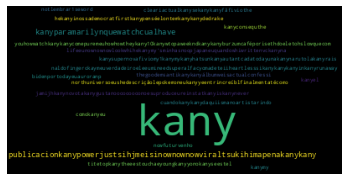

In [ ]:
word_cloud=WordCloud(background_color="black",max_font_size=50).generate("".join(lemme_df))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

Bag-of-Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(lemme_df)
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(cv.get_feature_names_out())

['10' 'actual' 'alfac' 'apena' 'artista' 'até' 'aurora' 'autant' 'biden'
 'burzum' 'cada' 'café' 'chaeyoung' 'cleari' 'com' 'come' 'como' 'confess'
 'consequ' 'cual' 'cuando' 'daqui' 'de' 'democrat' 'descrição' 'doe'
 'drake' 'el' 'ele' 'elon' 'em' 'entr' 'estel' 'estou' 'eu' 'finalment'
 'finger' 'first' 'fivio' 'futur' 'fã' 'good' 'gusta' 'hatsun' 'have' 'he'
 'heartless' 'hj' 'how' 'in' 'increíbl' 'is' 'jami' 'japan' 'jh' 'just'
 'kany' 'la' 'le' 'lembrar' 'let' 'life' 'look' 'made' 'mano' 'marilyn'
 'me' 'meu' 'mi' 'minha' 'my' 'na' 'naldo' 'naruto' 'need' 'never' 'no'
 'nooooooooo' 'north' 'nossa' 'not' 'novo' 'now' 'np' 'oh' 'okay' 'para'
 'pensé' 'pokemon' 'por' 'power' 'produc' 'publicacion' 'pure' 'quando'
 'que' 'rais' 'reinstat' 'rindo' 'runaway' 'santi' 'se' 'seth' 'she' 'si'
 'slow' 'snoop' 'su' 'super' 'supernova' 'ta' 'te' 'tem' 'the' 'they'
 'tite' 'today' 'top' 'tsukihim' 'una' 'universo' 'vc' 'venho'
 'verdadeiro' 'viral' 'watch' 'we' 'weeknd' 'whi' 'word' 'written' '

Tf-idf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_model=TfidfVectorizer()
tf_idf_vec=tf_idf_model.fit_transform(lemme_df)
tf_idf_arr=tf_idf_vec.toarray()
print(tf_idf_arr[10])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
words_Set=tf_idf_model.get_feature_names_out()
print(words_Set)

['10' 'actual' 'alfac' 'apena' 'artista' 'até' 'aurora' 'autant' 'biden'
 'burzum' 'cada' 'café' 'chaeyoung' 'cleari' 'com' 'come' 'como' 'confess'
 'consequ' 'cual' 'cuando' 'daqui' 'de' 'democrat' 'descrição' 'doe'
 'drake' 'el' 'ele' 'elon' 'em' 'entr' 'estel' 'estou' 'eu' 'finalment'
 'finger' 'first' 'fivio' 'futur' 'fã' 'good' 'gusta' 'hatsun' 'have' 'he'
 'heartless' 'hj' 'how' 'in' 'increíbl' 'is' 'jami' 'japan' 'jh' 'just'
 'kany' 'la' 'le' 'lembrar' 'let' 'life' 'look' 'made' 'mano' 'marilyn'
 'me' 'meu' 'mi' 'minha' 'my' 'na' 'naldo' 'naruto' 'need' 'never' 'no'
 'nooooooooo' 'north' 'nossa' 'not' 'novo' 'now' 'np' 'oh' 'okay' 'para'
 'pensé' 'pokemon' 'por' 'power' 'produc' 'publicacion' 'pure' 'quando'
 'que' 'rais' 'reinstat' 'rindo' 'runaway' 'santi' 'se' 'seth' 'she' 'si'
 'slow' 'snoop' 'su' 'super' 'supernova' 'ta' 'te' 'tem' 'the' 'they'
 'tite' 'today' 'top' 'tsukihim' 'una' 'universo' 'vc' 'venho'
 'verdadeiro' 'viral' 'watch' 'we' 'weeknd' 'whi' 'word' 'written' '

In [ ]:
clean_text = df['Tweet_stopwords']

In [ ]:
clean_text[100]

['Elon',
 'Musk',
 ':',
 '``',
 'It',
 '’',
 'ok',
 'verified',
 'bot',
 'accounts',
 'follow',
 'terms',
 'service',
 '&',
 'amp',
 ';',
 '’',
 'impersonate',
 'human',
 "''"]

Word2Vec

In [ ]:
import gensim
from gensim.models import Word2Vec
import pandas as pd

In [ ]:
model = gensim.models.Word2Vec(clean_text, size=100, window=5)

TypeError: ignored

In [ ]:
model.train(clean_text,total_examples=model.corpus_count,epochs=model.epochs)

In [ ]:
vocab = list(model.wv.vocab.keys())
print(vocab)

NameError: ignored

In [ ]:
model.wv.most_similar("west")

##POS Staging

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
tokens = lemme_df
tags = nltk.pos_tag(tokens, tagset = "universal")
tags

[('publicacion', 'NOUN'),
 ('kany', 'NOUN'),
 ('power', 'NOUN'),
 ('just', 'ADV'),
 ('si', 'ADV'),
 ('hj', 'VERB'),
 ('me', 'PRON'),
 ('i', 'ADJ'),
 ('si', 'VERB'),
 ('now', 'ADV'),
 ('now', 'ADV'),
 ('now', 'ADV'),
 ('viral', 'ADJ'),
 ('tsukihim', 'NOUN'),
 ('apena', 'NOUN'),
 ('kany', 'VERB'),
 ('kany', 'ADJ'),
 ('#', '.'),
 ('kany', 'ADJ'),
 ('para', 'NOUN'),
 ('marilyn', 'NOUN'),
 ('que', 'NOUN'),
 ('watch', 'VERB'),
 ('cual', 'NOUN'),
 ('have', 'VERB'),
 ('#', '.'),
 ('naldo', 'ADJ'),
 ('finger', 'NOUN'),
 ('okay', 'VERB'),
 ('meu', 'VERB'),
 ('verdadeiro', 'NOUN'),
 ('ele', 'X'),
 ('eu', 'NOUN'),
 ('mi', 'NOUN'),
 ('need', 'VERB'),
 ('super', 'ADJ'),
 ('alfac', 'NOUN'),
 ('yo', 'NOUN'),
 ('made', 'VERB'),
 ('te', 'NOUN'),
 ('i', 'NOUN'),
 ('i', 'VERB'),
 ('heartless', 'NOUN'),
 ('si', 'NOUN'),
 ('kany', 'VERB'),
 ('kany', 'ADJ'),
 ('kany', 'NOUN'),
 ('in', 'ADP'),
 ('kany', 'ADJ'),
 ('runaway-kany', 'ADJ'),
 ('supernova', 'NOUN'),
 ('fivio', 'NOUN'),
 ('my', 'PRON'),
 ('1', 'NUM'

In [ ]:
!pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')
doc = nlp('Real family stick together and see through the mirage The smokescreens, perceptions of false reality Who the real owner if your boss gets a salary? I am one with the people I am one with the people (Real)')
displacy.render(doc, style = "dep")

'<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" xml:lang="en" id="0c1c0b13f3b94e3ba824f3f482f683b9-0" class="displacy" width="6700" height="574.5" direction="ltr" style="max-width: none; height: 574.5px; color: #000000; background: #ffffff; font-family: Arial; direction: ltr">\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="484.5">\n    <tspan class="displacy-word" fill="currentColor" x="50">Real</tspan>\n    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="50">ADJ</tspan>\n</text>\n\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="484.5">\n    <tspan class="displacy-word" fill="currentColor" x="225">family</tspan>\n    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="225">NOUN</tspan>\n</text>\n\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="484.5">\n    <tspan class="displacy-word" fill="currentColor" x="400">stick</tspan>\n    <tspan class="displacy

In [ ]:
sentence = "God made it rain, the devil made it hail"
doc = nlp(sentence)
displacy.render(doc, style='dep', jupyter=True)